# Avacado Average price prediction
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. In this dataset we have 18249 rows and 14 columns including both dependent and indpendent variables. The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying. Since the target variable is is continuous in nature will use Regresson models to predict the price of the fruit*
The following are the relevant columns in the dataset
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Inspiration /Label

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [65]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [66]:
# Dropping the unnamed column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [67]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

In [68]:
#checking the dimension of the dataset
df.shape

(18249, 13)

In [69]:
# checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [70]:
# Changing date column from object type to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
# Checking the dtypes again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [72]:
df['Month'] = df['Date'].dt.month

In [73]:
df['Day'] = df['Date'].dt.day

Now we have separated Month and Day from Date column and now the column Date is no use,so dropping it.

In [74]:
df.drop("Date",axis=1,inplace=True)

In [75]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [76]:
# checking the dimensions of dataset again
df.shape

(18249, 14)

In [77]:
# Overviewing the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int32  
 13  Day           18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 1.8+ MB


In [78]:
# checking the number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [79]:
# Checking for null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

# Visualizing Missing Values using heatmap

<Axes: >

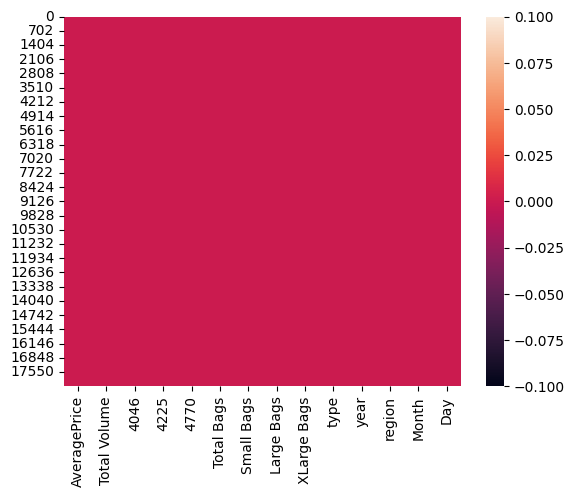

In [80]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())

In [81]:
# checking the number of columns in the datast
df.columns.tolist()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Month',
 'Day']

In [82]:
# Checking the uniqueness of the target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [83]:
# List of values in the target column
df['AveragePrice'].value_counts()

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64

In [84]:
# Checking whether the dataset contains any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


# Description of Dataset

In [85]:
# Statistical summary of the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset.
The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.
The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.
The mean is greater than the median in most of the columns which means they are skewed to right.
In some of the columns median is greater than the mean, hence they are skewed to left.
Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.
By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.
Before visualizing the data let's separate the categorical and numerical columns.

In [86]:
# Checking for Categorical columns
Categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
print(Categorical_col)

['type', 'region']


In [87]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Visualization of Dataset

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64


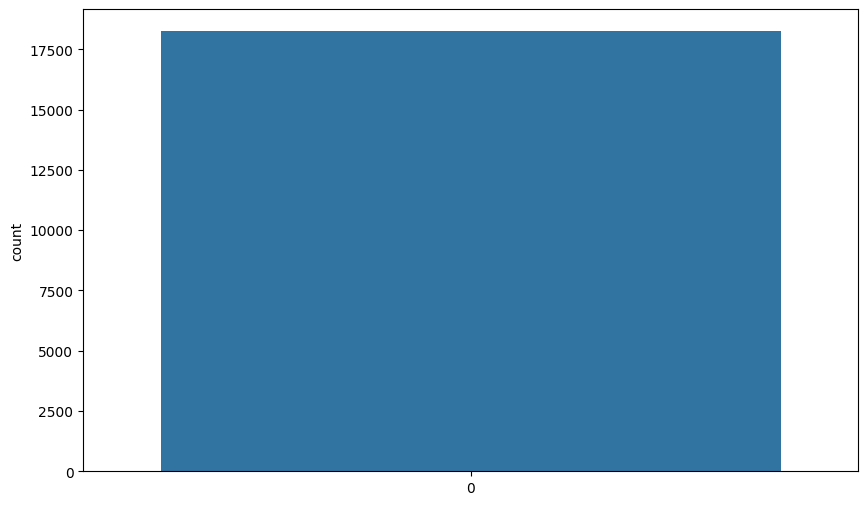

In [88]:
# Visualize the count of the year
print(df['year'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['year'])
plt.show()

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


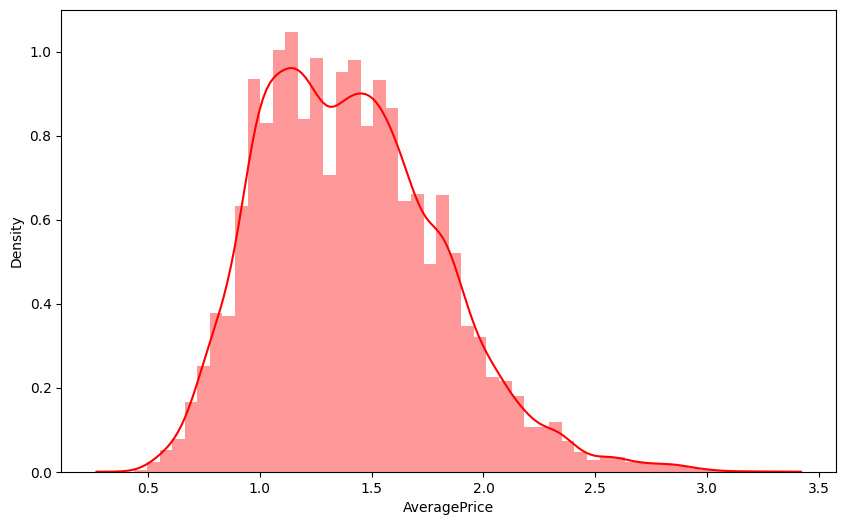

In [89]:
# Distribution plot fro the target variable "AveragePrice"
print(df['AveragePrice'].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df['AveragePrice'], color='r')
plt.show()

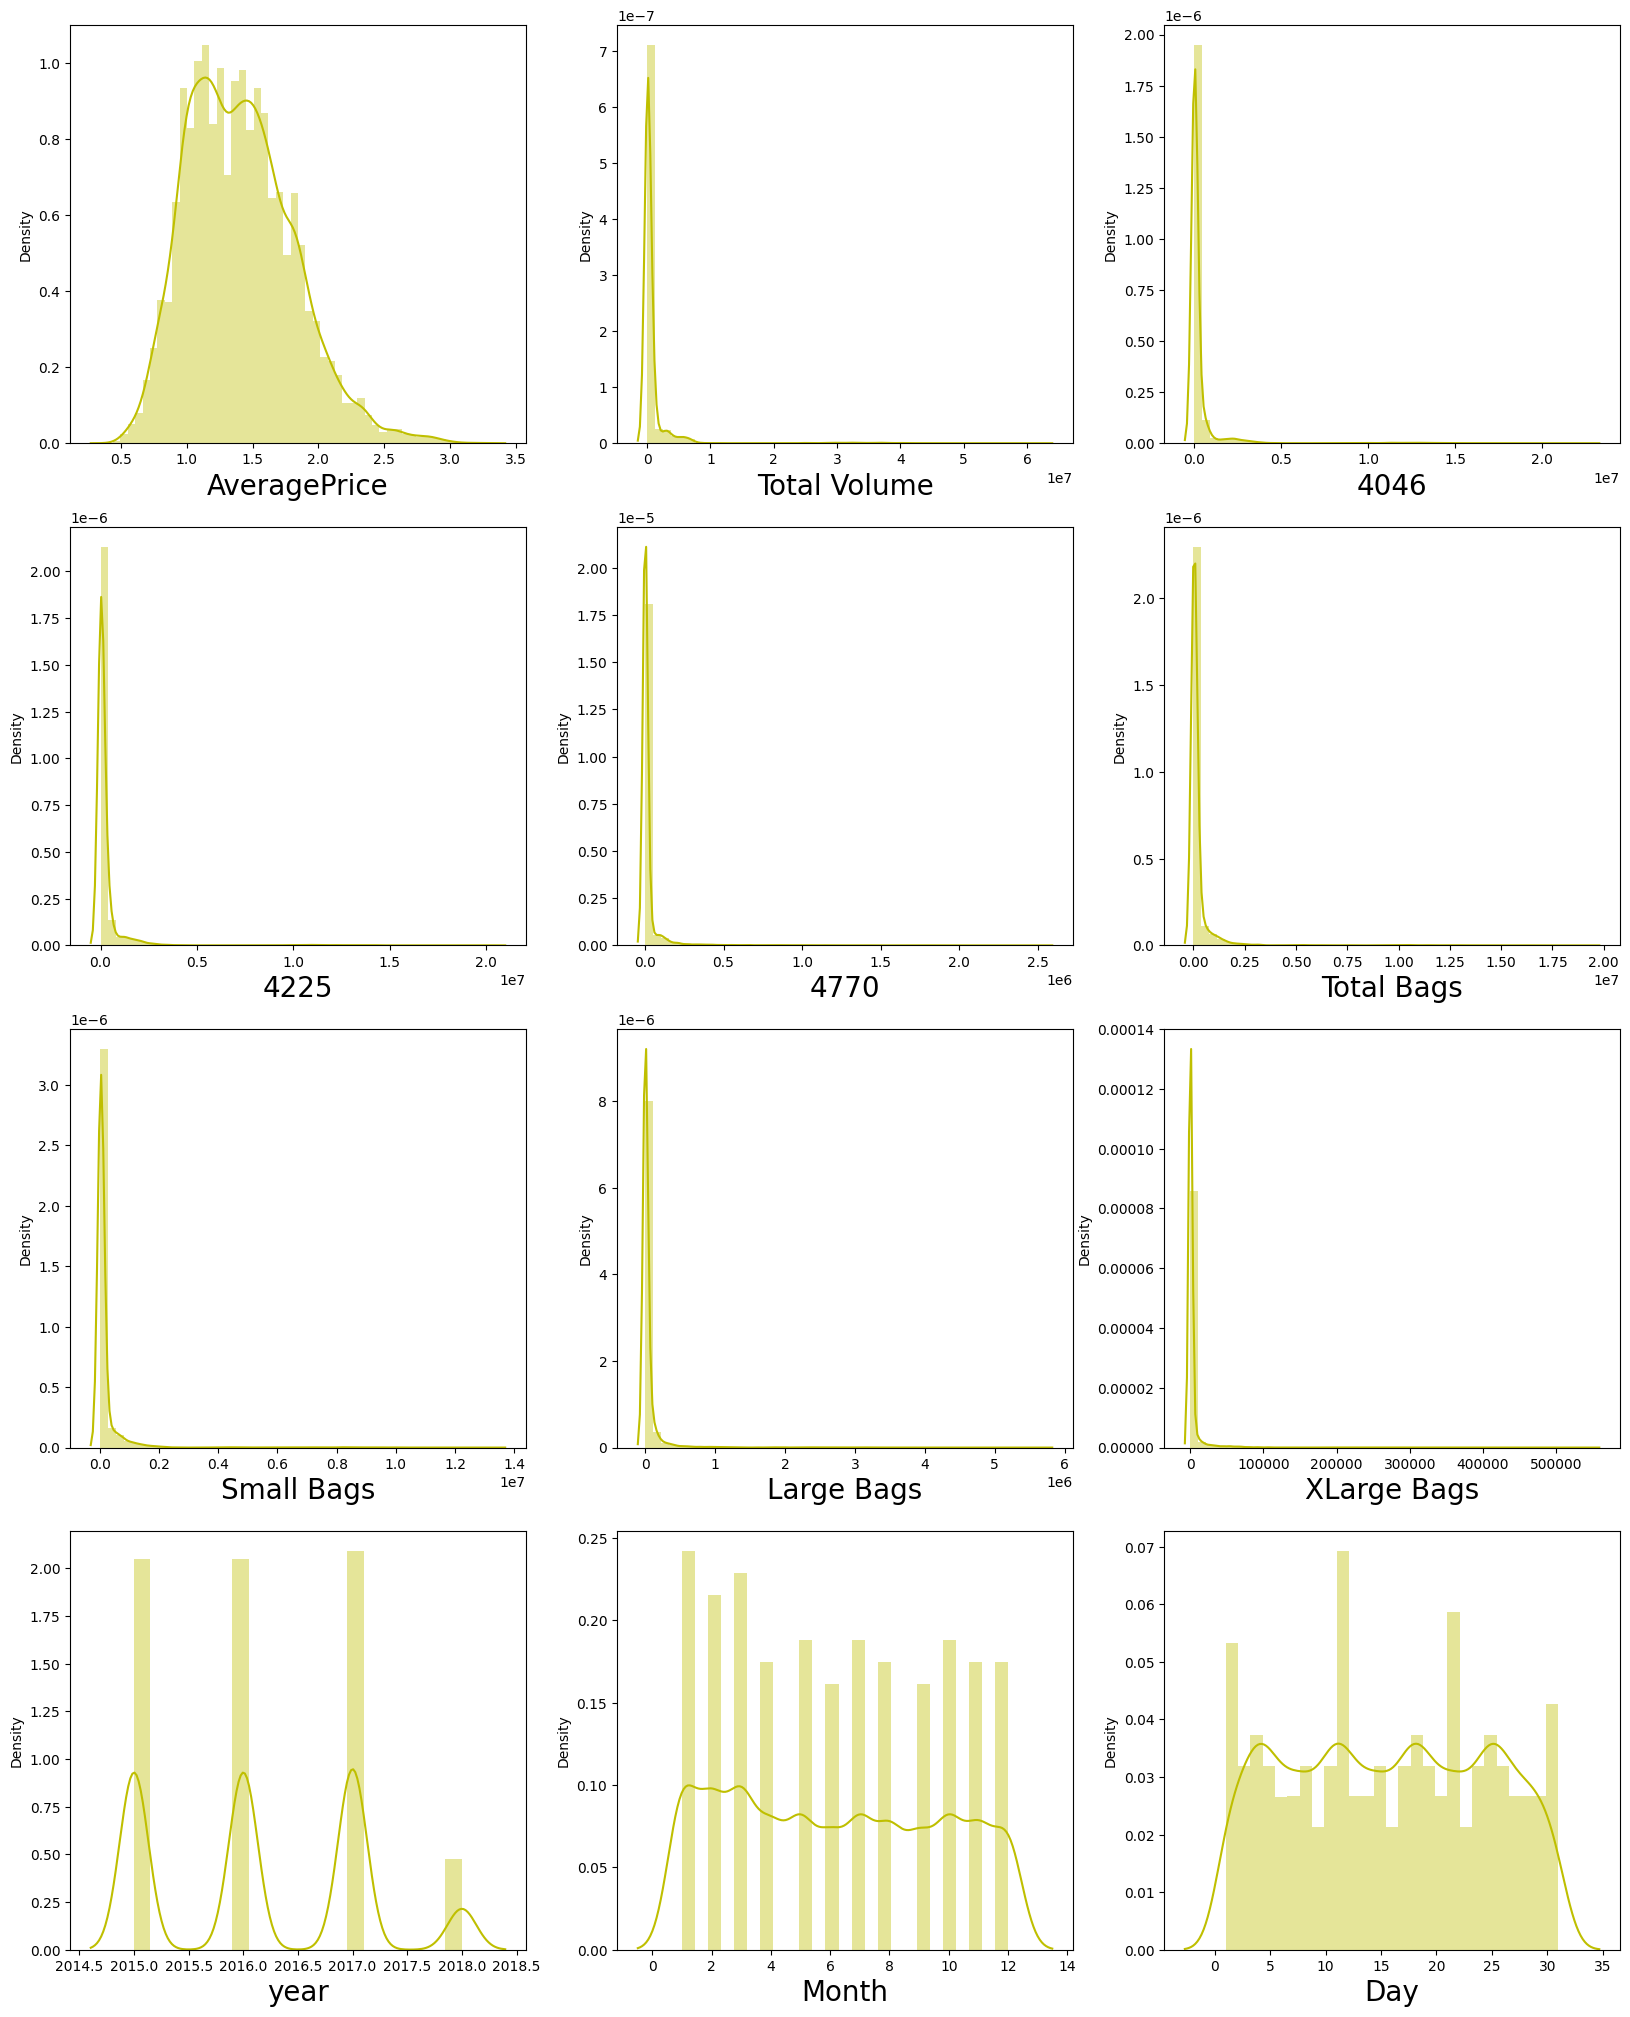

In [90]:
# Checking how the data is distributed in each column.
plt.figure(figsize=(20,25))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='y')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

# Bivariate Analysis:

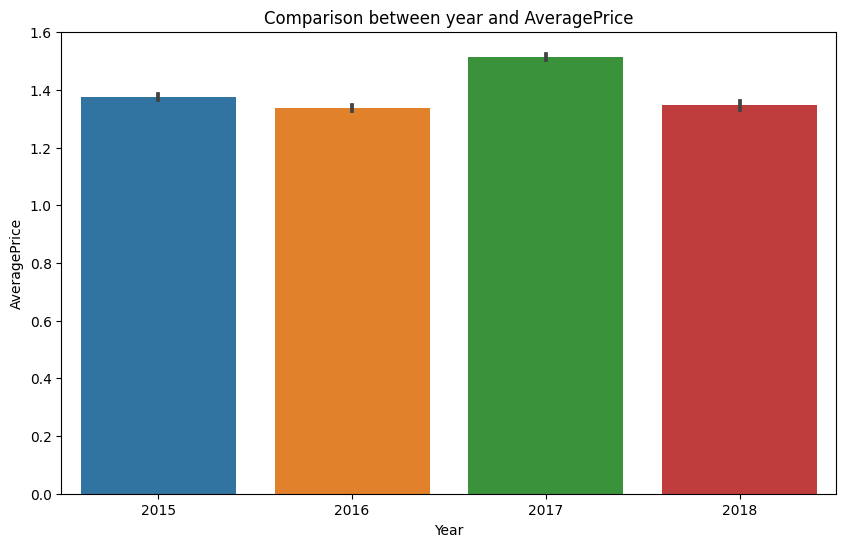

In [91]:
plt.figure(figsize=(10, 6))
plt.title("Comparison between year and AveragePrice")
sns.barplot(x='year', y='AveragePrice', data=df)
plt.xlabel("Year")
plt.ylabel("AveragePrice")
plt.show()


In [92]:
!?sns.catplot

'?sns.catplot' is not recognized as an internal or external command,
operable program or batch file.


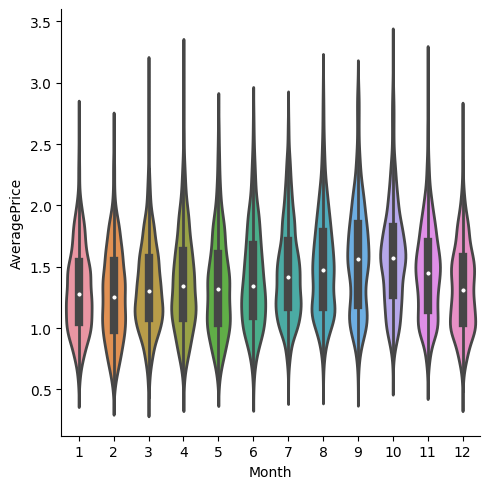

In [93]:
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df, linewidth=2)

From the plot we can say that the AveragePrice remians high during 8th(August month), 9th(September) and 10th(October) month and starts to fall from November onwards Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

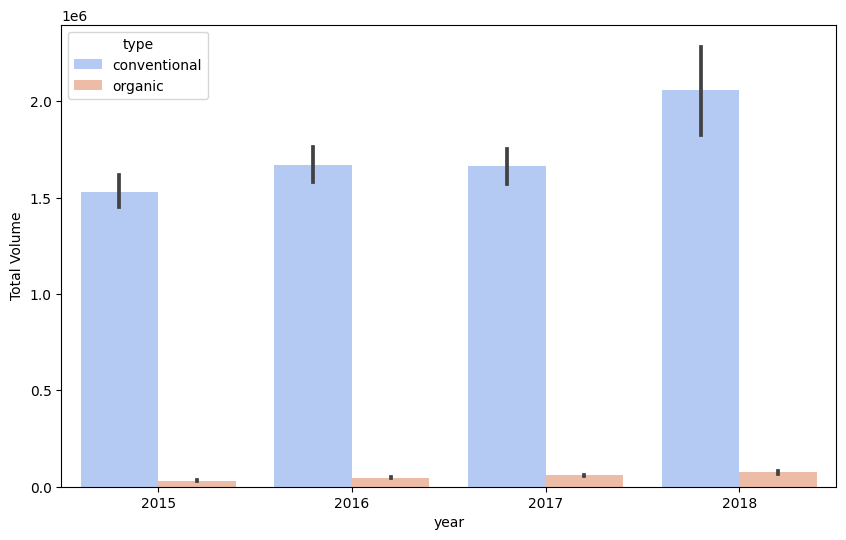

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

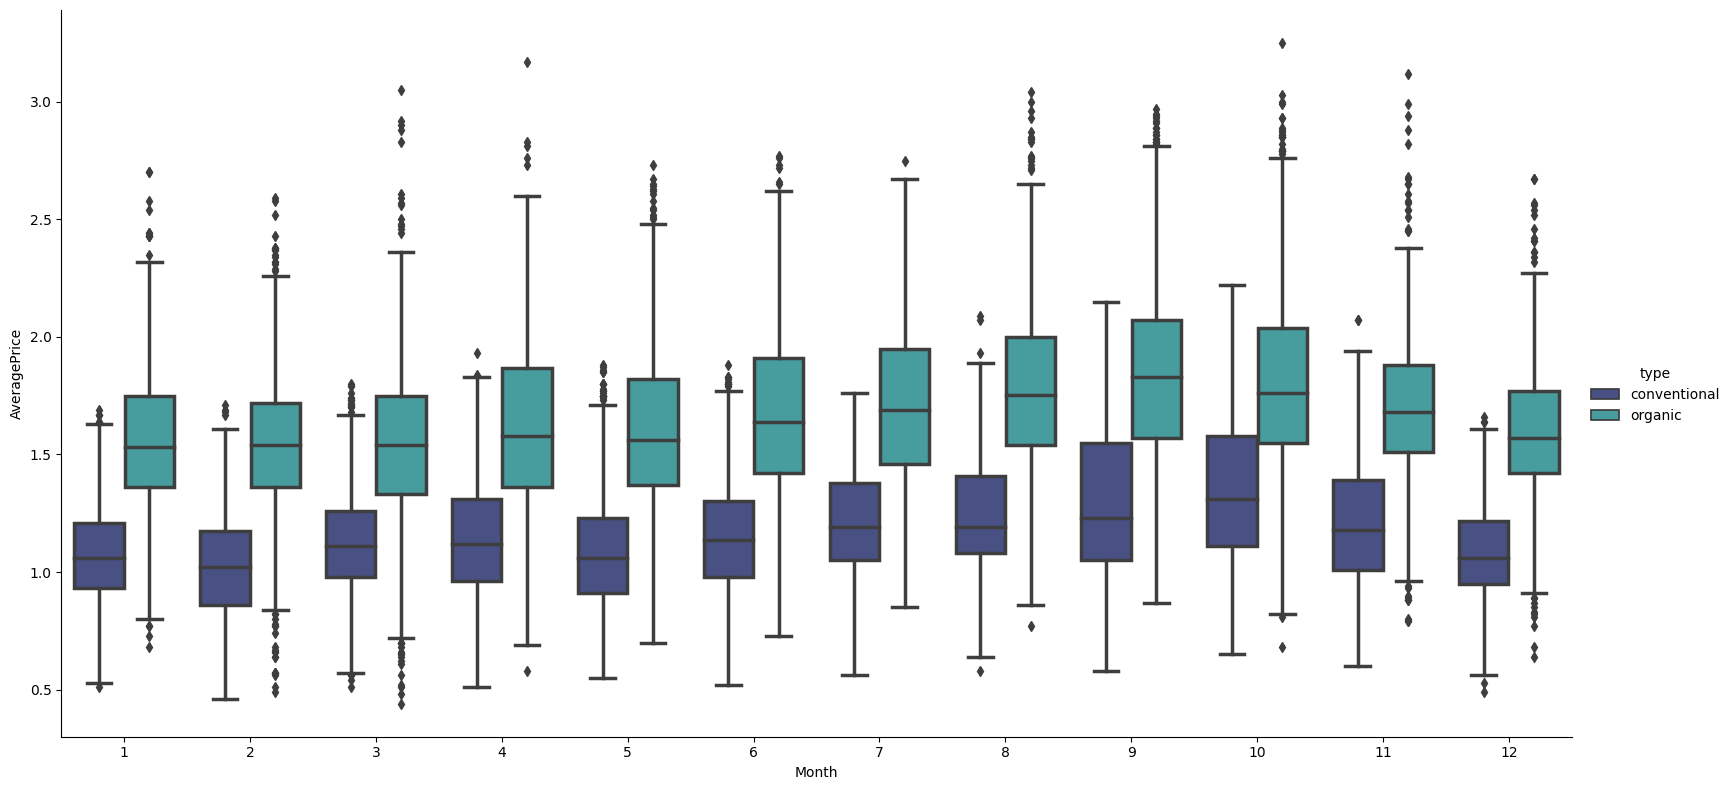

In [95]:
sns.catplot(x='Month', y='AveragePrice', hue='type', kind = 'box', data=df, height=8, linewidth=2.5, aspect=2, palette='mako')

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

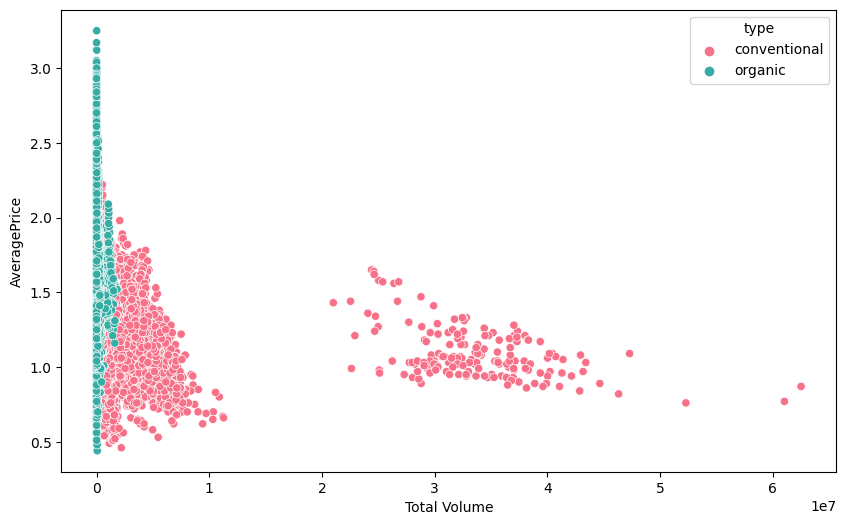

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y='AveragePrice',hue='type',data=df,palette='husl')
plt.show()

The scatterplot givces the relationship between the total volume and average price with respect to type. All organic type of avacado lies in the zero volume and the average price is high for organic. The conventional type avacado has total volume 0-4 with the average price upto 2.3. So the Average Price of the organic type with zero volume is more than the conventional type.

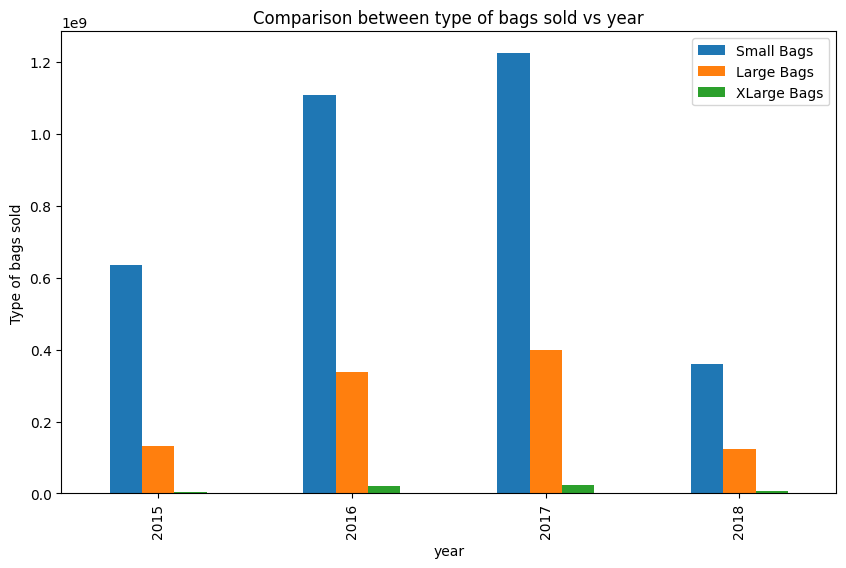

In [97]:
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

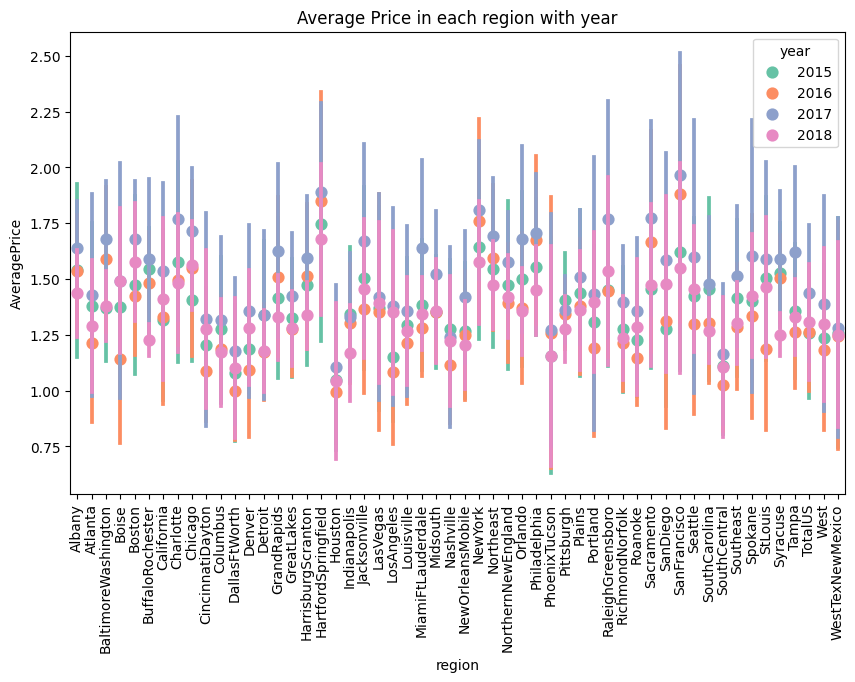

In [98]:
plt.figure(figsize=(10,6))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df,hue='year',join=False,palette='Set2',ci='sd')
plt.xticks(rotation=90)
plt.show()

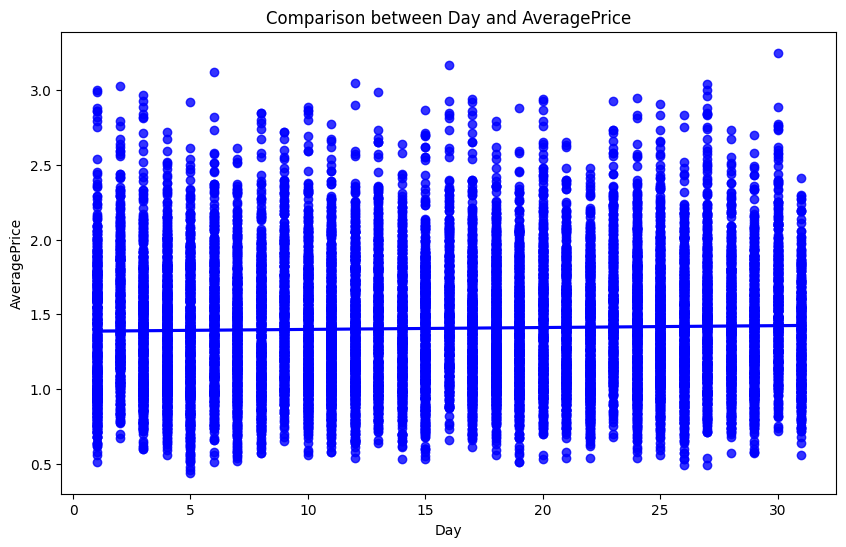

In [99]:
plt.figure(figsize=(10, 6))
plt.title("Comparison between Day and AveragePrice")
sns.regplot(x='Day', y='AveragePrice', data=df, color='b')
plt.show()


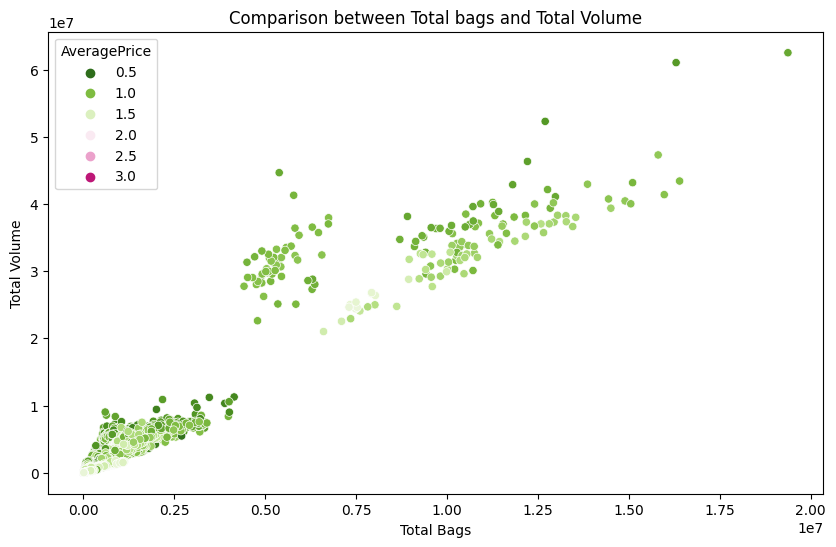

In [100]:
plt.figure(figsize=(10,6))
plt.title("Comparison between Total bags and Total Volume")
sns.scatterplot(data=df,x='Total Bags', y ='Total Volume',hue='AveragePrice',palette='PiYG_r')
plt.show()


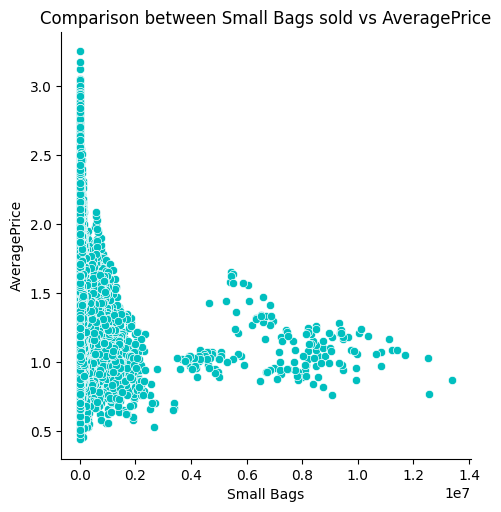

In [101]:
sns.relplot(x='Small Bags', y='AveragePrice', data=df, color='c')
plt.title("Comparison between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()


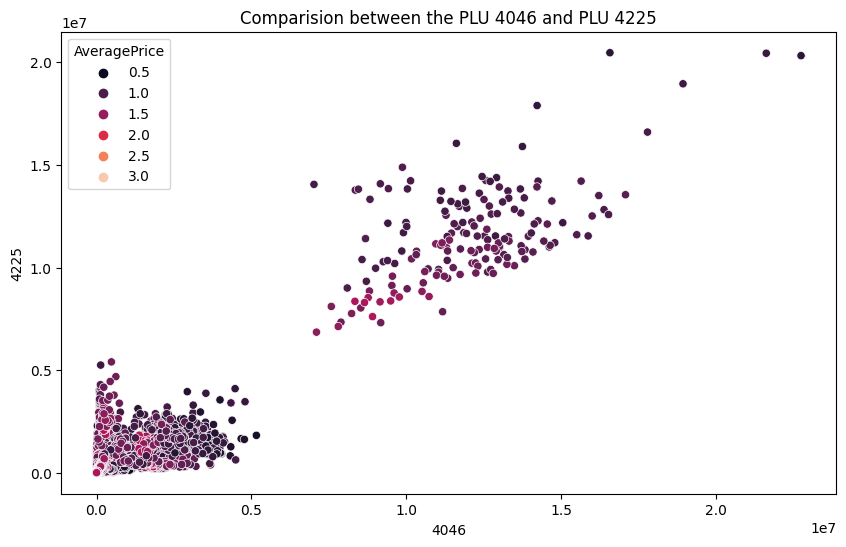

In [102]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(x=df["4046"], y=df["4225"], hue=df["AveragePrice"], palette="rocket")
plt.show()


# Outliers

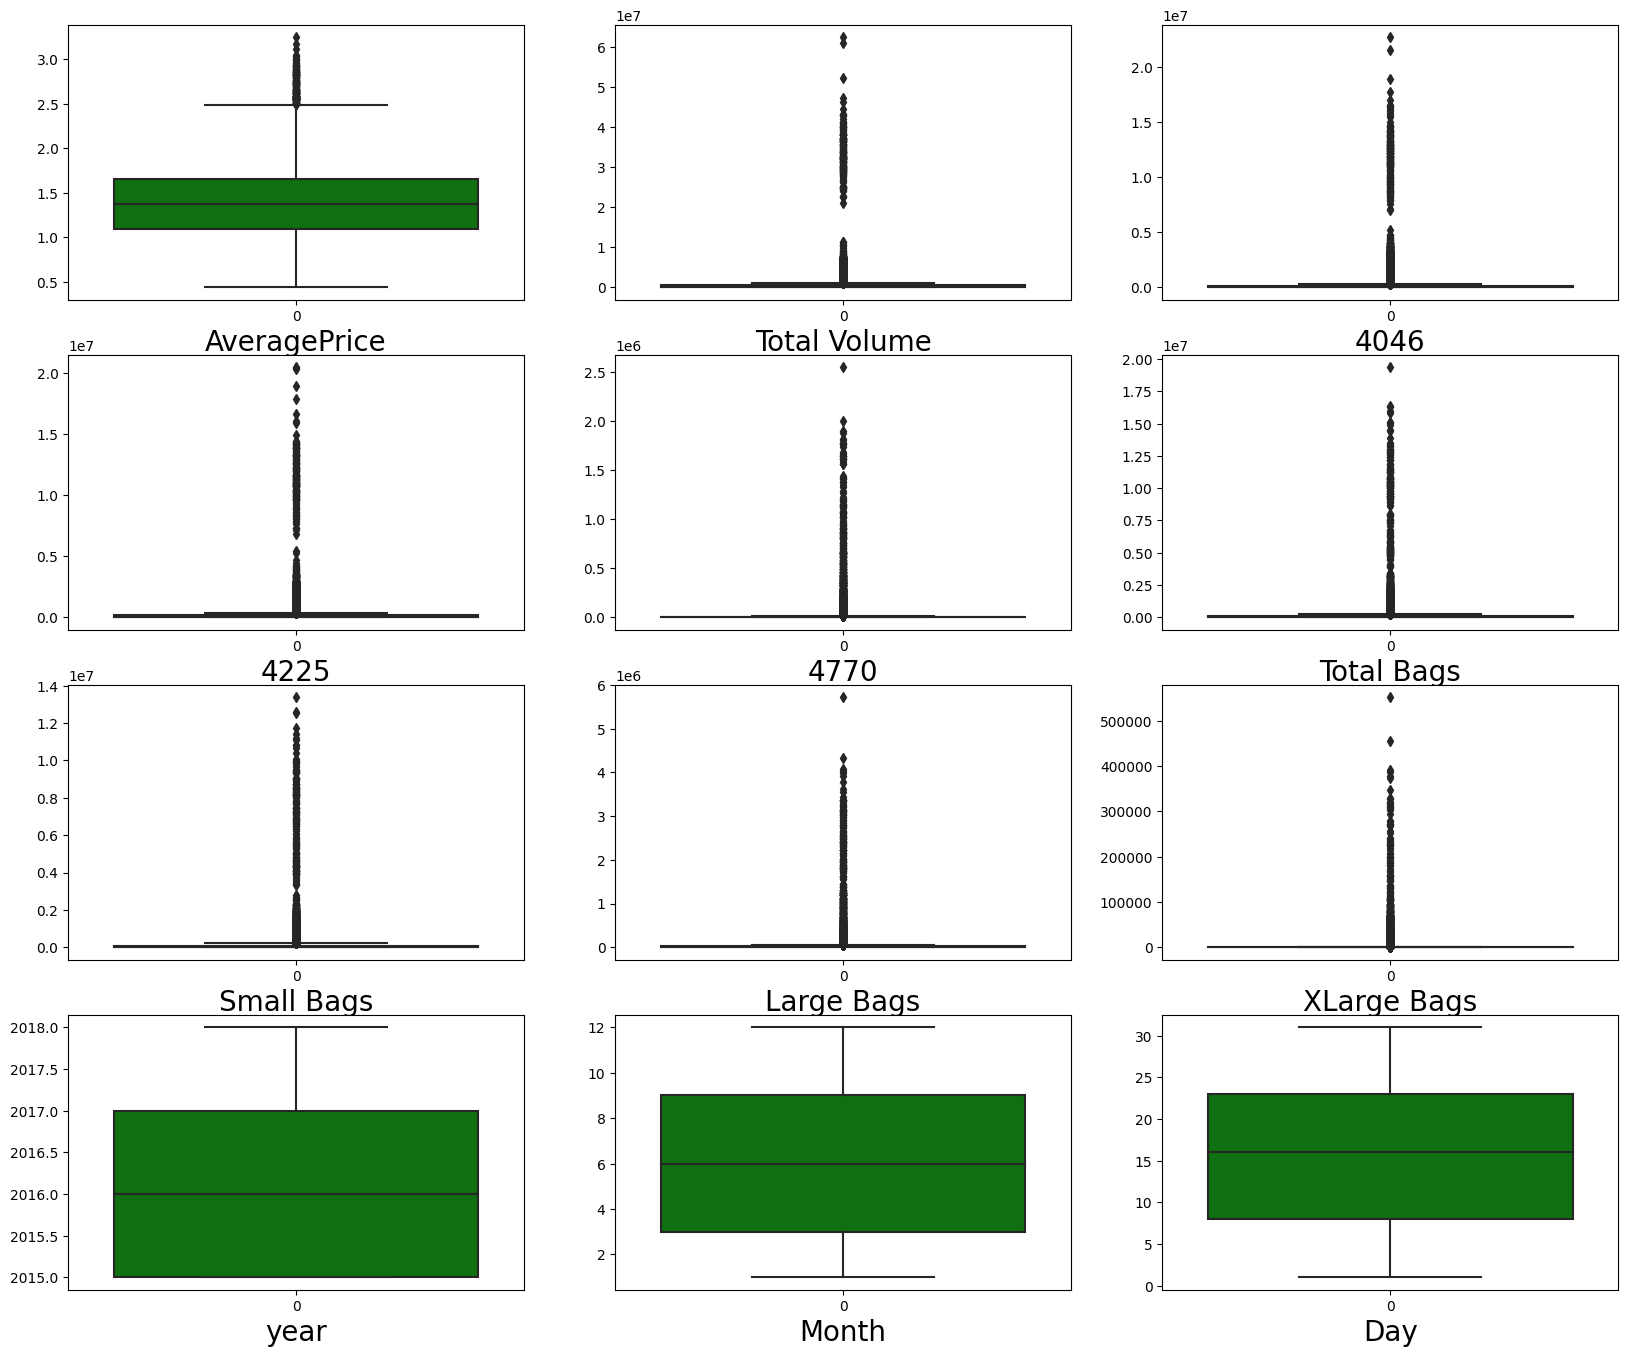

In [103]:
numerical_col = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

# Removing Outliers:

In [104]:
from scipy.stats import zscore
features = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z = np.abs(zscore(features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [105]:
new_df = df[(z<3).all(axis=1)]
new_df


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [106]:
print(df.shape)
print(new_df.shape)

(18249, 14)
(17782, 14)


# Checking for Skewness

In [112]:
# Select only numeric columns from the DataFrame
numeric_cols = new_df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for numeric columns
skewness = numeric_cols.skew()

# Print or use the skewness values as needed
print(skewness)


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64


# Removing Skewness using yeo-johnson

In [113]:
# Removing skewness using yeo johnson to get better predictions
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [114]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [116]:
# Select only numeric columns from the DataFrame
numeric_cols = new_df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for numeric columns
skewness = numeric_cols.skew()

# Print or use the skewness values as needed
print(skewness)


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
dtype: float64


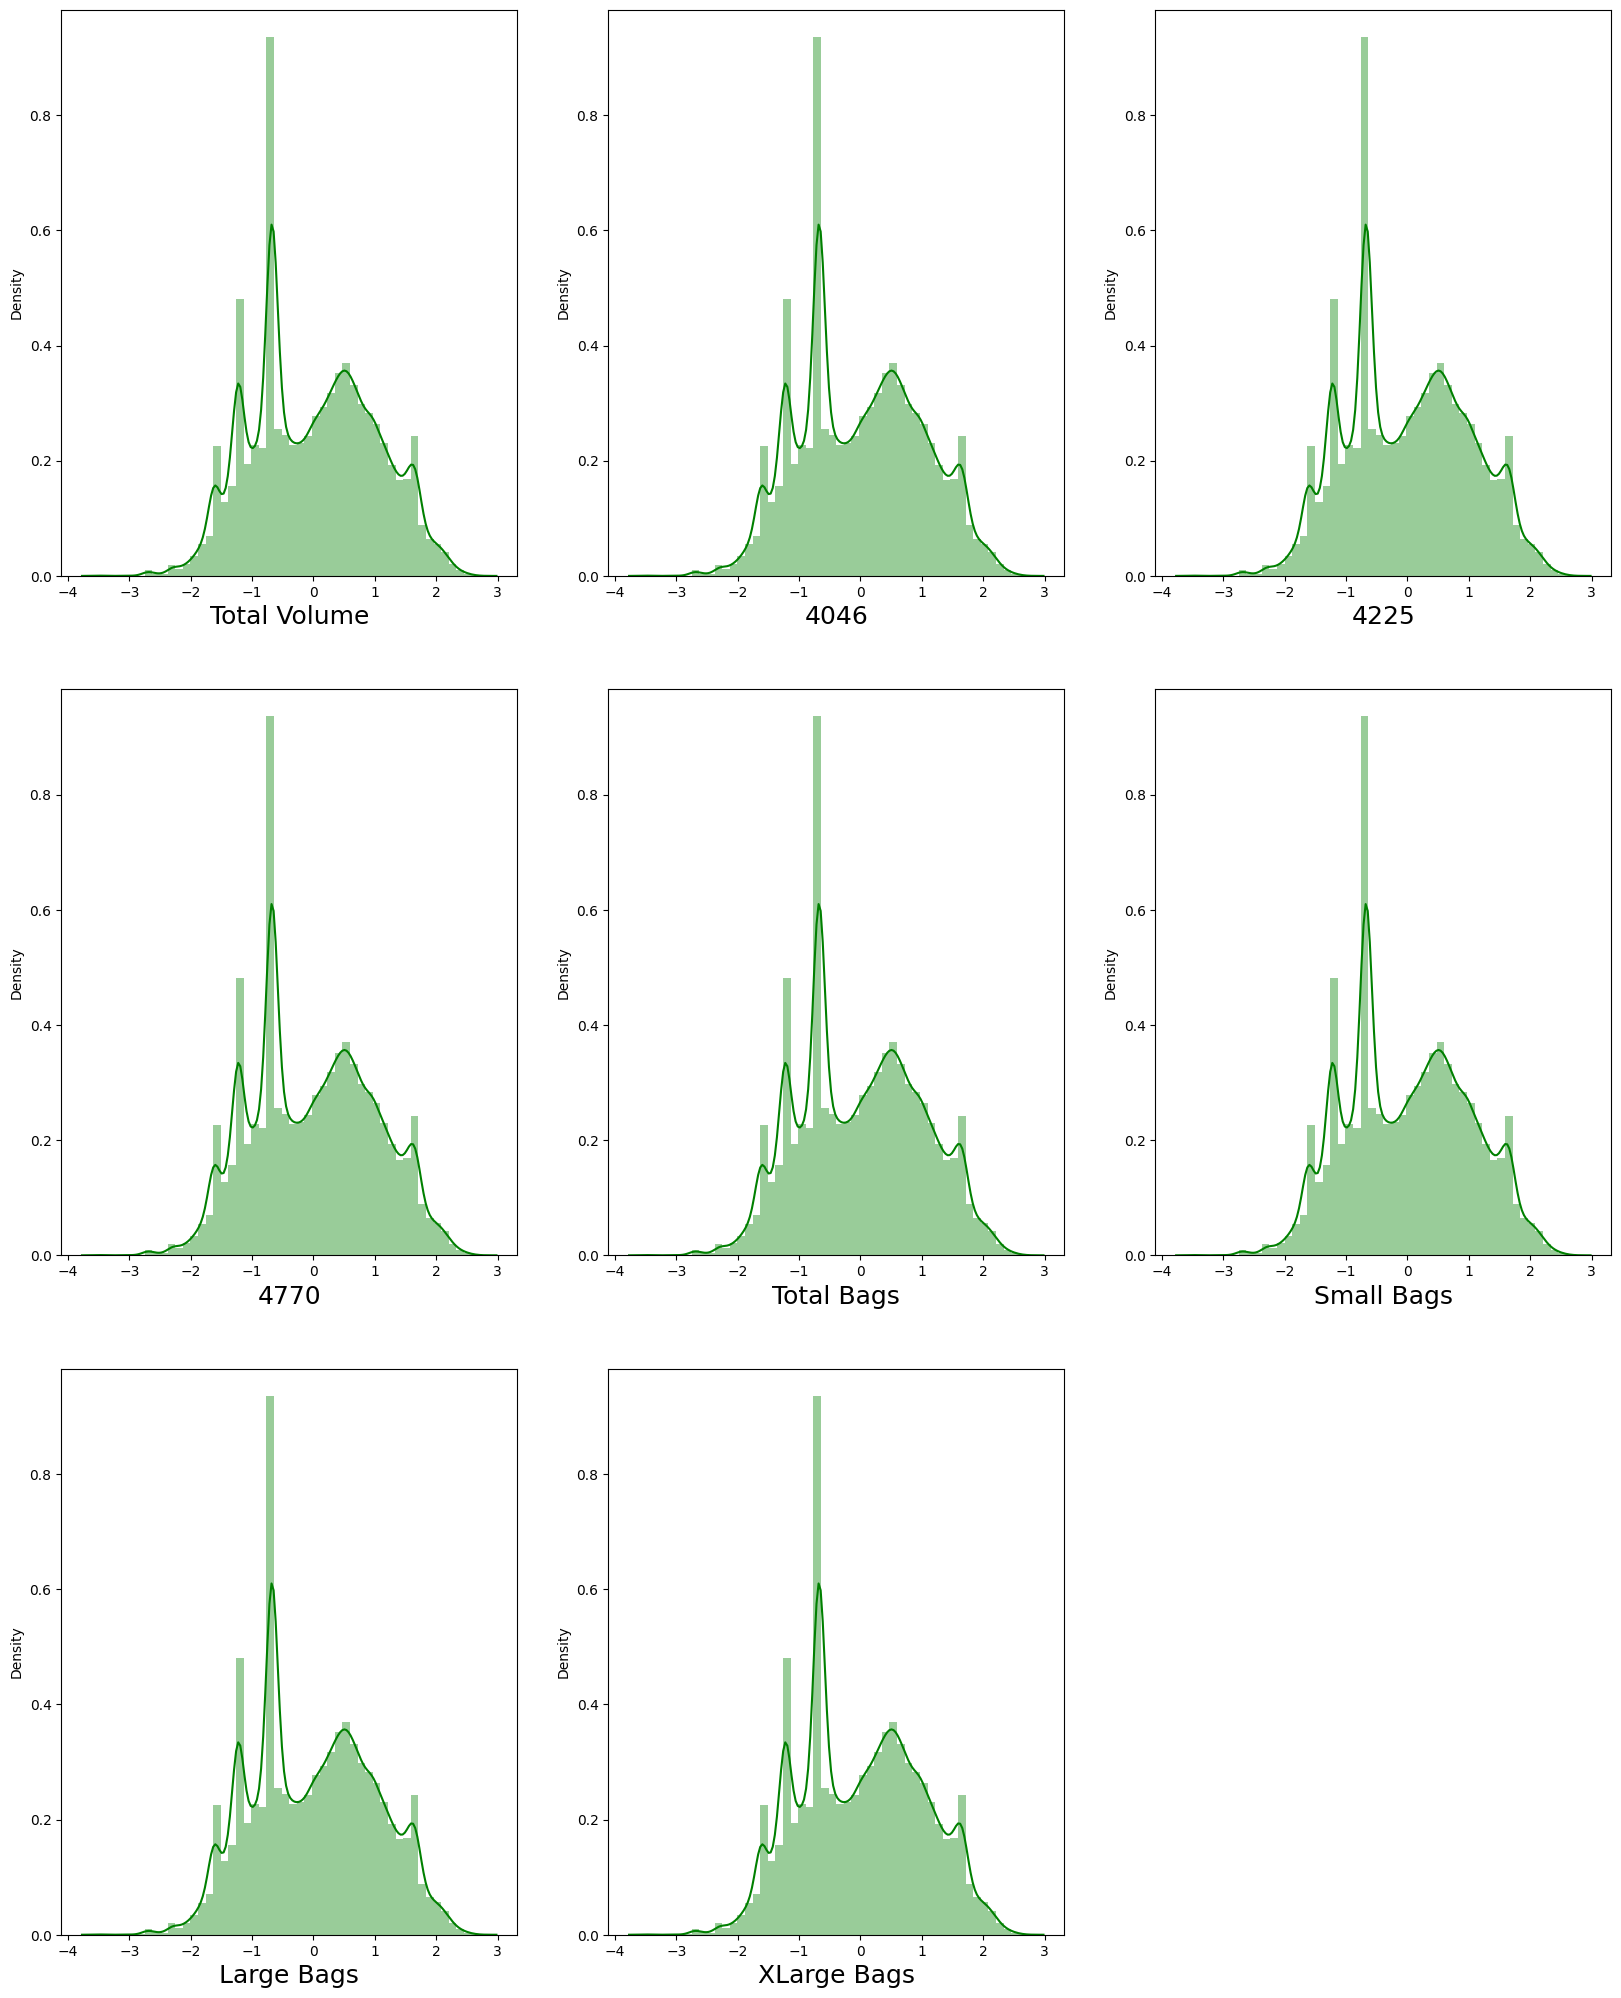

In [117]:
# Checking the data distribution in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[features],color='g')
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

# Encoding the Categorical data using LabelEncoder

In [118]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type','region']
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)

In [119]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation

In [120]:
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,0.159574,-0.020865,0.018751,0.010241
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.007399,0.021970,-0.005044,-0.002469


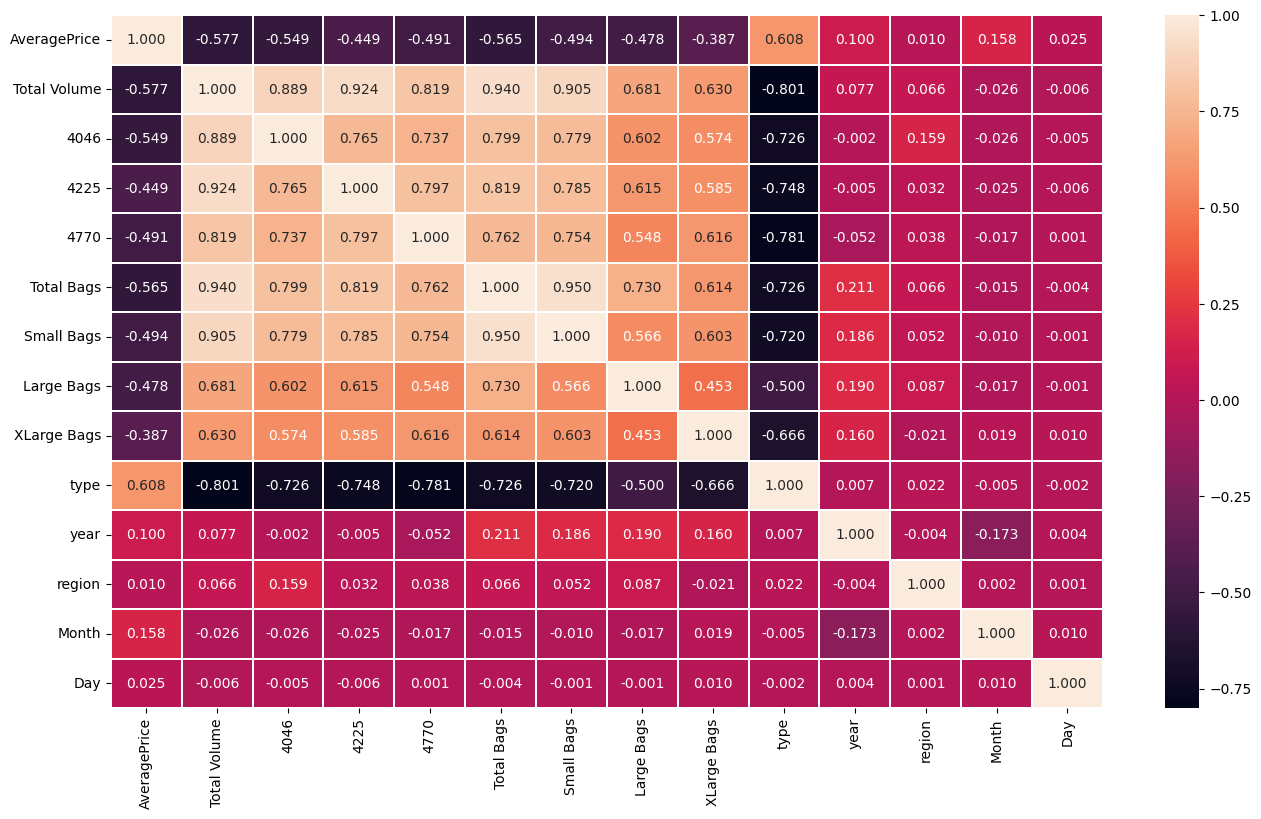

In [121]:
#Lets visualize the coorelation using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

# Visualizing the correaltion between label and features using bar plot

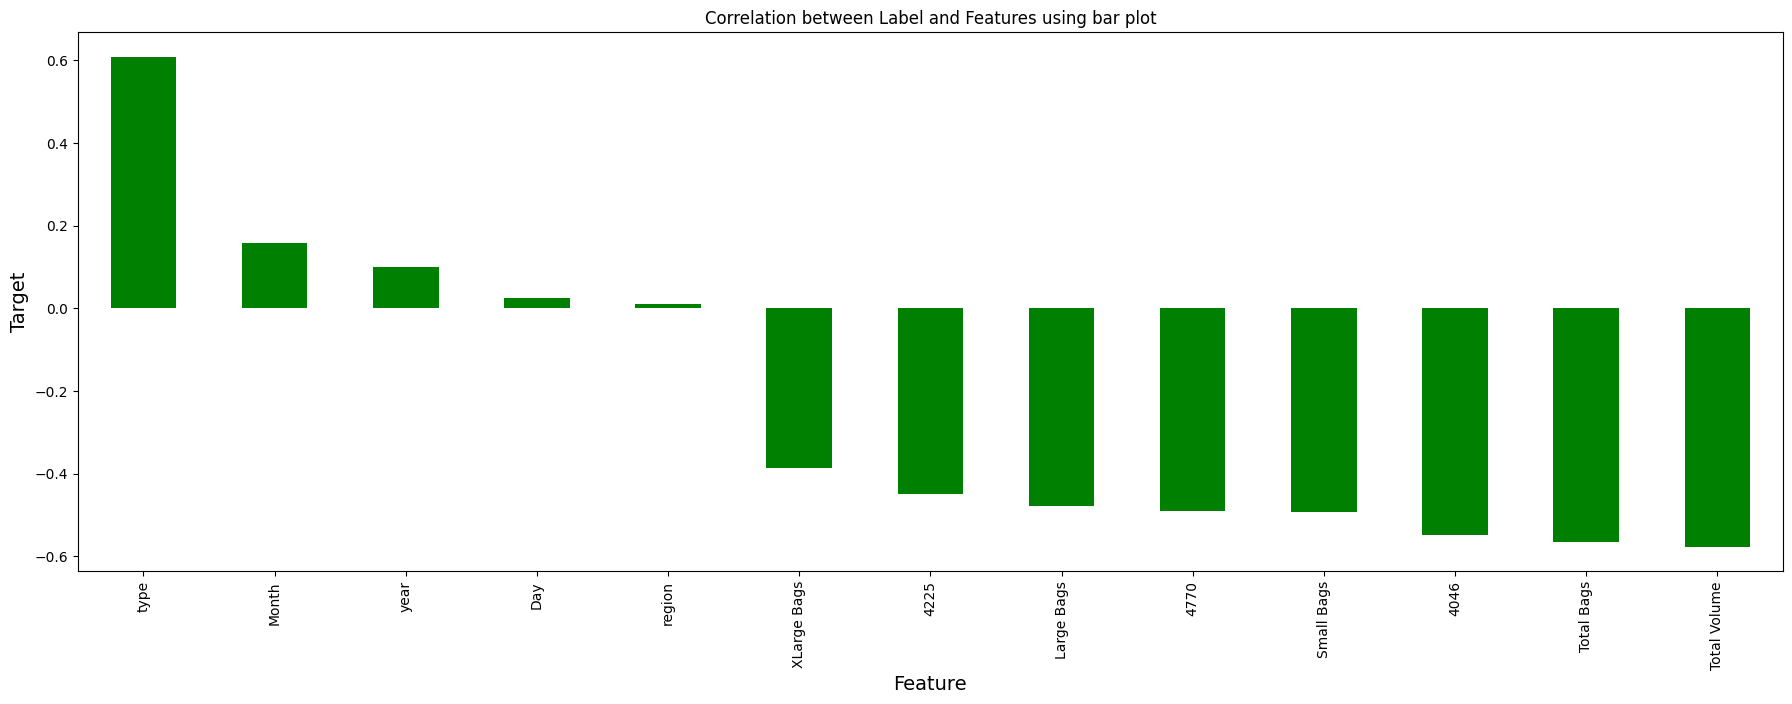

In [122]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()


In [123]:
# Dropping irrelavent columns
new_df.drop('region',axis=1,inplace=True)
new_df.drop('Day',axis=1,inplace=True)

In [124]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,11


# Separating out features and labels

In [125]:
x = new_df.drop('AveragePrice',axis=1)
y = new_df['AveragePrice']

In [126]:
x.shape

(17782, 11)

In [127]:
y.shape

(17782,)

In [128]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,11


# Standard Scalarization

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,0.974238,1.979143,-1.468572


# Multicolinearity

In [130]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.831970,Total Volume
1,6.809754,4046
2,11.169506,4225
3,3.953688,4770
4,34.438285,Total Bags
5,16.636584,Small Bags
6,3.462759,Large Bags
7,2.046154,XLarge Bags
8,3.681651,type
9,1.386798,year


In [131]:
# Dropping the feature Total Bags
df.drop('Total Volume',axis=1,inplace=True)

In [132]:
# Again checking the vif after removing one column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,51.831970,Total Volume
1,6.809754,4046
2,11.169506,4225
3,3.953688,4770
4,34.438285,Total Bags
5,16.636584,Small Bags
6,3.462759,Large Bags
7,2.046154,XLarge Bags
8,3.681651,type
9,1.386798,year


In [133]:
# Droping the column total Bags
df.drop('Total Bags',axis=1,inplace=True)

In [134]:
# checking VIF again
vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif


,VIF values,Features
0,51.831970,Total Volume
1,6.809754,4046
2,11.169506,4225
3,3.953688,4770
4,34.438285,Total Bags
5,16.636584,Small Bags
6,3.462759,Large Bags
7,2.046154,XLarge Bags
8,3.681651,type
9,1.386798,year


In [135]:
# DataFrame after preprocessing and data cleaning.
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-1.214908,1.358706


# Modeling

In [136]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [137]:
from sklearn.neighbors import KNeighborsRegressor as KNN

maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=i)
    knn=KNN()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is ",maxAcc,"at random_state",i)

Maximum r2_score is  0.8729114575764966 at random_state 99


# Creating new train test split

In [138]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [139]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# RandomForestRegressor

In [140]:
# checking r2_score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
print("R2_score :",r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RFR))

# Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_RFR))

# Root Mean Squared error(RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))

R2_score : 0.8682362349859503
MAE: 0.102282099343955
MSE: 0.02173237271602624
RMSE: 0.14741903783442029


# The r2_score using RandomForestRegressor is 86%.

Linear Regression

In [141]:
# Checking r2_score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))
print("MAE:",metrics.mean_absolute_error(y_test,pred_LR))
print("MSE:",metrics.mean_squared_error(y_test,pred_LR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

R2_score: 0.5609818106714558
MAE: 0.20820103620973934
MSE: 0.0724091856253923
RMSE: 0.2690895494540661


The r2_score using Linear Regression is 56%.

Support Vector Machine Regressor

In [142]:
# checking r2_score for SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_svr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_svr))
print("MSE:",metrics.mean_squared_error(y_test,pred_svr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))

r2_score: 0.7777094350351121
MAE: 0.13980178724851827
MSE: 0.03666335284634496
RMSE: 0.19147676842464456


The r2_score using Support Vector Regressor is 77%

Stochastic Gradient Descent Regressor

In [143]:
# Checking r2_score for SGD
SGD = SGDRegressor()
SGD.fit(x_train,y_train)
pred_SGD = SGD.predict(x_test)
print("R2_score:",r2_score(y_test,pred_SGD))
print("MAE:",metrics.mean_absolute_error(y_test,pred_SGD))
print("MSE:",metrics.mean_squared_error(y_test,pred_SGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_SGD)))

R2_score: 0.5597683311135269
MAE: 0.20865182320396394
MSE: 0.07260933010390941
RMSE: 0.2694611847816108


The r2_score using Stochastic Gradient Descent Regressor is 55%

KNN Regressor

In [144]:
# Checking r2_score for KNN
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_knn)))

R2_score: 0.8729114575764966
MAE: 0.10226616682286783
MSE: 0.02096126785379569
RMSE: 0.14478006718397285


The r2_score using KNNRegressor is 87%

Gradient Boosting Regressor

In [146]:
# Checking r2_score for KNN
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))
print("MAE:",metrics.mean_absolute_error(y_test,pred_GB))
print("MSE:",metrics.mean_squared_error(y_test,pred_GB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.7223720057573316
MAE: 0.16172791666696973
MSE: 0.045790396522451475
RMSE: 0.2139869073622297


The R2 score using GradientBoosting Regressor regressor is 72%

Hyperparameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
# KNeighbor Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [149]:
GCV = GridSearchCV(KNN(),parameters,cv=5)

In [150]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [151]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [152]:
avacado = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avacado.fit(x_train,y_train)
pred = avacado.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))
print('R2_score :',r2_score(y_test,pred)*100)

RMSE value : 0.14741903783442029
R2_score : 88.99968053907125


After tuning the r2_score of the model is increased and it is 88%.

Saving the model

In [153]:
# saving the model using pkl
import pickle
filename1='Avacado.pkl'
pickle.dump(avacado, open(filename1,'wb'))